In [1]:
import sys, os
sys.path.insert(0, os.path.abspath(".."))

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from src import loading_data


In [3]:
def get_savepath(feature_set):
    savepath = os.path.join('../results_2_tsne',feature_set)
    return savepath
def load_tsne(feature_set,file_name='all_host'):
    """
    file_name: str -> ['all_host','wse2_low','mos2_low']
    """
    savepath = get_savepath(feature_set)

    tsne = pd.read_csv(os.path.join(savepath,f'entire_dataset/{file_name}.csv'),index_col=0)

    return tsne

def load_full_df():
    full_low_df = loading_data.full_data('2dmd','all_low_density','cfid')
    full_high_df = loading_data.full_data('2dmd','all_high_density','cfid')
    full_low_df['base_density'] = 'low_'+ full_low_df['base'] 
    full_high_df['base_density'] = 'high_'+ full_high_df['base'] 

    full_raw_df = pd.concat([full_low_df,full_high_df])
    return full_raw_df

In [4]:
class tsne_plotter():
    def __init__(self,full_raw_df):
        self.full_raw_df = full_raw_df


        
        
    def plot_tsne(self, df_tsne, labels, 
                selected_index=None, is_label=True,
                legend_title='host', use_marker=False, ax=None, s = None):
        """
        Plot t-SNE results with flexible visualization:
        - use_marker=True : distinct markers + colors per label
        - use_marker=False: only colors per label (default seaborn style)
        """
        import matplotlib.pyplot as plt
        import seaborn as sns
        import colorcet as cc
        import pandas as pd

        if selected_index is not None:
            df_tsne = df_tsne.loc[selected_index, :]
            labels = labels.loc[selected_index]

        plt.rcParams.update({'font.size': 14})
        if ax is None:
            figure, ax = plt.subplots(figsize=(10, 8))
        else:
            figure = ax.get_figure()

        palette = cc.glasbey[:len(labels.unique())]
        df_plot = pd.merge(df_tsne, labels, left_index=True, right_index=True)

        if s is None:
            s = 80
        if use_marker:
            # Marker + color per label
            marker_styles = ['o', 's', 'D', 'P', 'X', '^', 'v', '<', '>']
            unique_labels = np.sort(labels.unique())

            for i, label in enumerate(unique_labels):
                subset = df_plot[df_plot[labels.name] == label]
                sns.scatterplot(
                    data=subset,
                    x='TSNE-1', y='TSNE-2',
                    hue=labels.name,
                    palette={label: palette[i]},  # one color per label
                    marker=marker_styles[i % len(marker_styles)],
                    s=s,
                    edgecolor='black',
                    linewidth=0.2,
                    alpha=0.6,
                    legend=is_label,  # avoid duplicate legends
                    ax=ax
                )
            if is_label:
                ax.legend(title='defect type', bbox_to_anchor=(1.0, 1),
                        loc='upper left', fontsize=18, title_fontsize=20)

        else:

            # Color only (Seaborn handles everything)
            sns.scatterplot(
                data=df_plot,
                x='TSNE-1', y='TSNE-2',
                hue=labels.name,
                palette=palette,
                alpha=0.7,
                s=s,
                edgecolor='black',
                linewidth=0.2,
                legend=is_label,
                ax=ax
            )
            if is_label:
                ax.legend(title=legend_title, bbox_to_anchor=(1.05, 1),
                        loc='upper left', fontsize=18, title_fontsize=20)

        figure.subplots_adjust(right=0.75)
        ax.set_xlabel("TSNE-1", fontsize=18)
        ax.set_ylabel("TSNE-2", fontsize=18)
        ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
        ax.set_aspect('equal', adjustable='box')
        sns.despine(ax=ax)

        return figure

    
    def plot_all_host(self,feature_set,is_label:bool=True,file_name:str='all_host',label_column='base',ax=None,s=None):
        tsne_data = load_tsne(feature_set,file_name=file_name)
        fig = self.plot_tsne(tsne_data,labels=self.full_raw_df[label_column],is_label=is_label,ax=ax,s=s)
        return fig
    
    def plot_single_host(self,feature_set:str,file_name:str,is_label:bool=True,label_column='description',s=None):
        tsne_data = load_tsne(feature_set,file_name=file_name)
        fig = self.plot_tsne(tsne_data,
                             selected_index=tsne_data.index,
                             labels=self.full_raw_df[label_column],
                             is_label=is_label,use_marker=True,s=s)
        return fig
    
    
    def plot_every_features(self,feature_sets:list,host='all'):
        fig, axs = plt.subplots(nrows=4,ncols=4,figsize=(15,15))
        i=0
        for ax,feature_set in zip(axs.flatten(),feature_sets):
            self.plot_all_host(feature_set,is_label=False,ax=ax,s=30)
            ax.set_xlabel(i)
            ax.axis("off")
            i += 1

            # ax.axis('off')

            


In [5]:
feature_incl_list = [
    'cfid',                             'tvd_l1_pristine_alldist_cfid',               'hellinger_l1_pristine_alldist_cfid',               'emd_l1_pristine_alldist_cfid',
    'vpa_subs_chem_cfid', 'vpa_subs_chem_tvd_l1_pristine_alldist_cfid', 'vpa_subs_chem_hellinger_l1_pristine_alldist_cfid', 'vpa_subs_chem_emd_l1_pristine_alldist_cfid',
    'vpa_mult_chem_cfid', 'vpa_mult_chem_tvd_l1_pristine_alldist_cfid', 'vpa_mult_chem_hellinger_l1_pristine_alldist_cfid', 'vpa_mult_chem_emd_l1_pristine_alldist_cfid',
    'vpa_divi_chem_cfid', 'vpa_divi_chem_tvd_l1_pristine_alldist_cfid', 'vpa_divi_chem_hellinger_l1_pristine_alldist_cfid', 'vpa_divi_chem_emd_l1_pristine_alldist_cfid',
                     
                     ]

In [6]:

feature_exclu_list = [
    'chem_dist0_cfid',                        'tvd_l1_pristine_cfid',               'hellinger_l1_pristine_cfid',               'emd_l1_pristine_cfid',
    'vpa_subs_chem_dist0_cfid', 'vpa_subs_chem_tvd_l1_pristine_cfid', 'vpa_subs_chem_hellinger_l1_pristine_cfid', 'vpa_subs_chem_emd_l1_pristine_cfid',
    'vpa_mult_chem_dist0_cfid', 'vpa_mult_chem_tvd_l1_pristine_cfid', 'vpa_mult_chem_hellinger_l1_pristine_cfid', 'vpa_mult_chem_emd_l1_pristine_cfid',
    'vpa_divi_chem_dist0_cfid', 'vpa_divi_chem_tvd_l1_pristine_cfid', 'vpa_divi_chem_hellinger_l1_pristine_cfid', 'vpa_divi_chem_emd_l1_pristine_cfid',
                     
                     ]

In [7]:
full_raw_df = load_full_df()

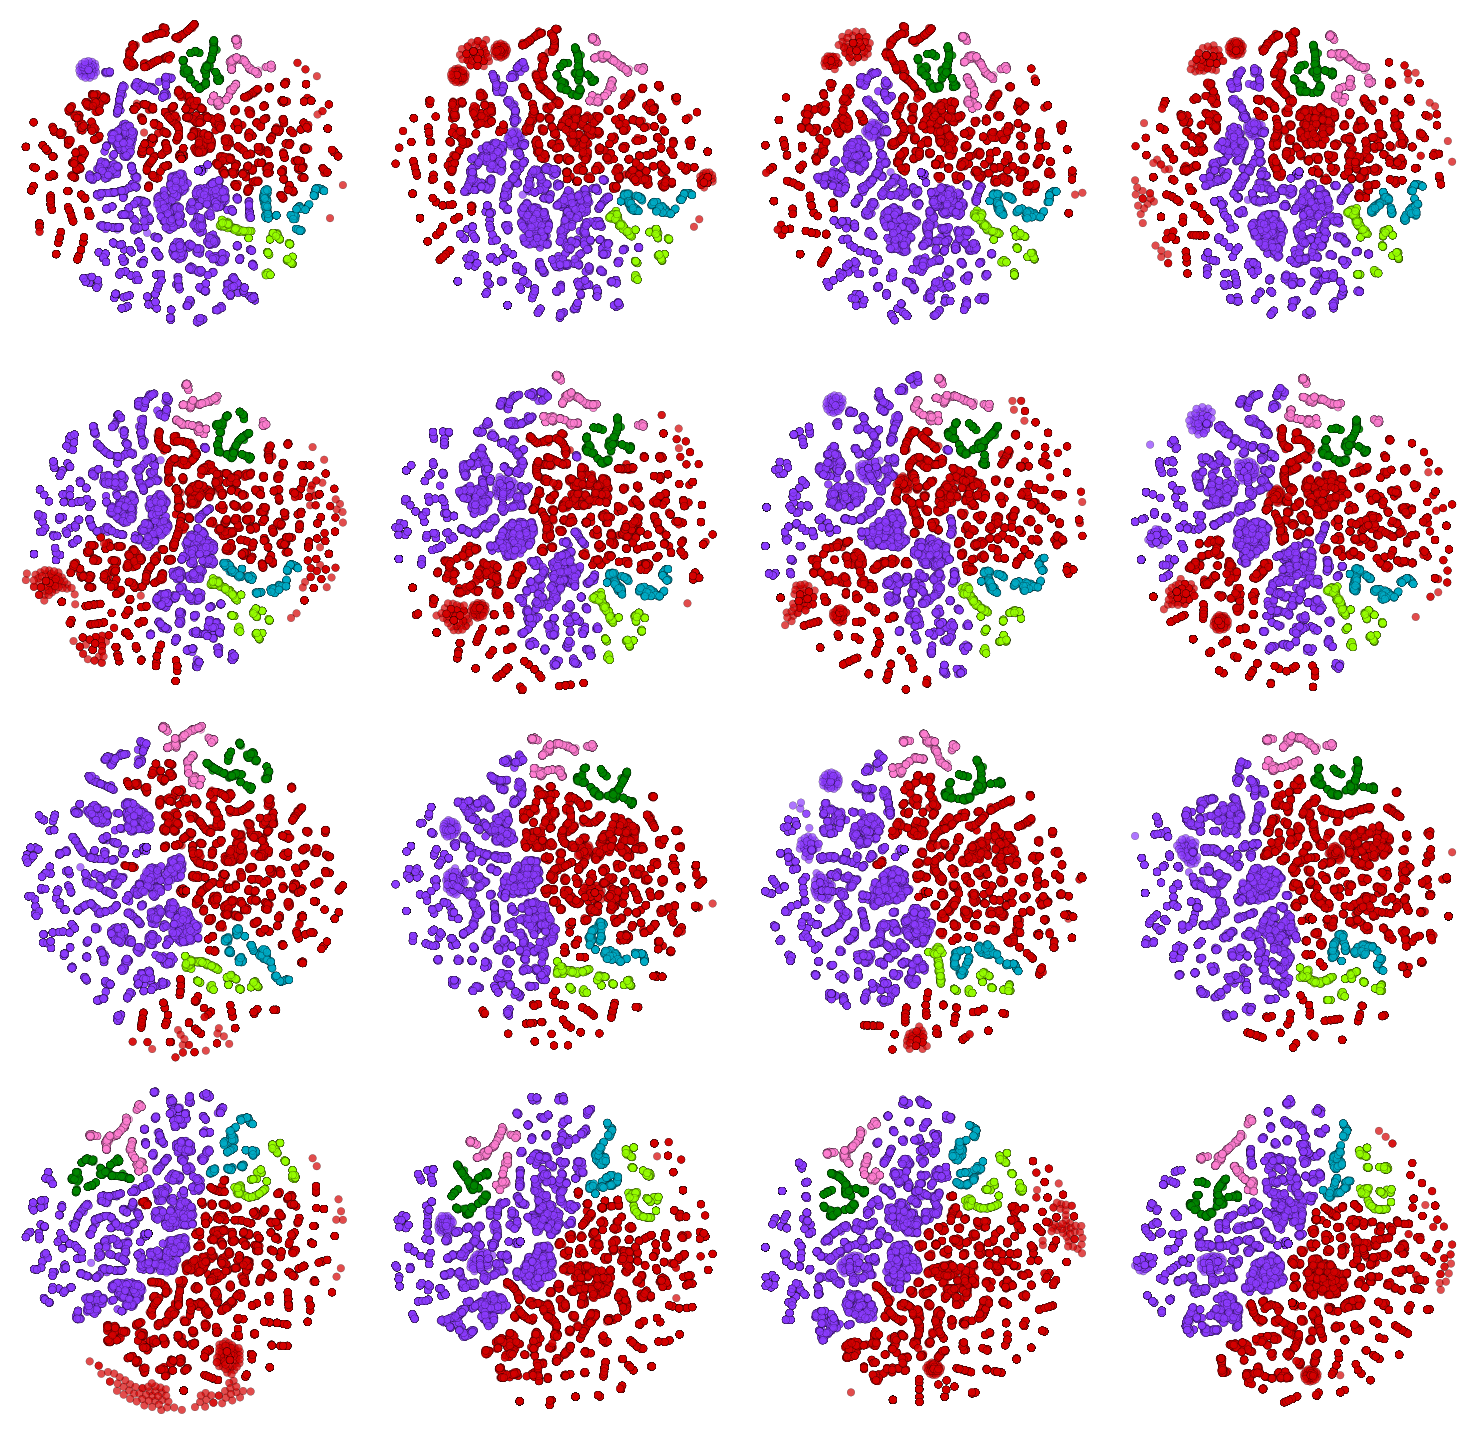

In [8]:
plotter = tsne_plotter(full_raw_df)
plotter.plot_every_features(feature_sets=feature_incl_list)
plt.tight_layout()
# plt.savefig("saved_figures/tsne-all_host-inclu.png", dpi=150)


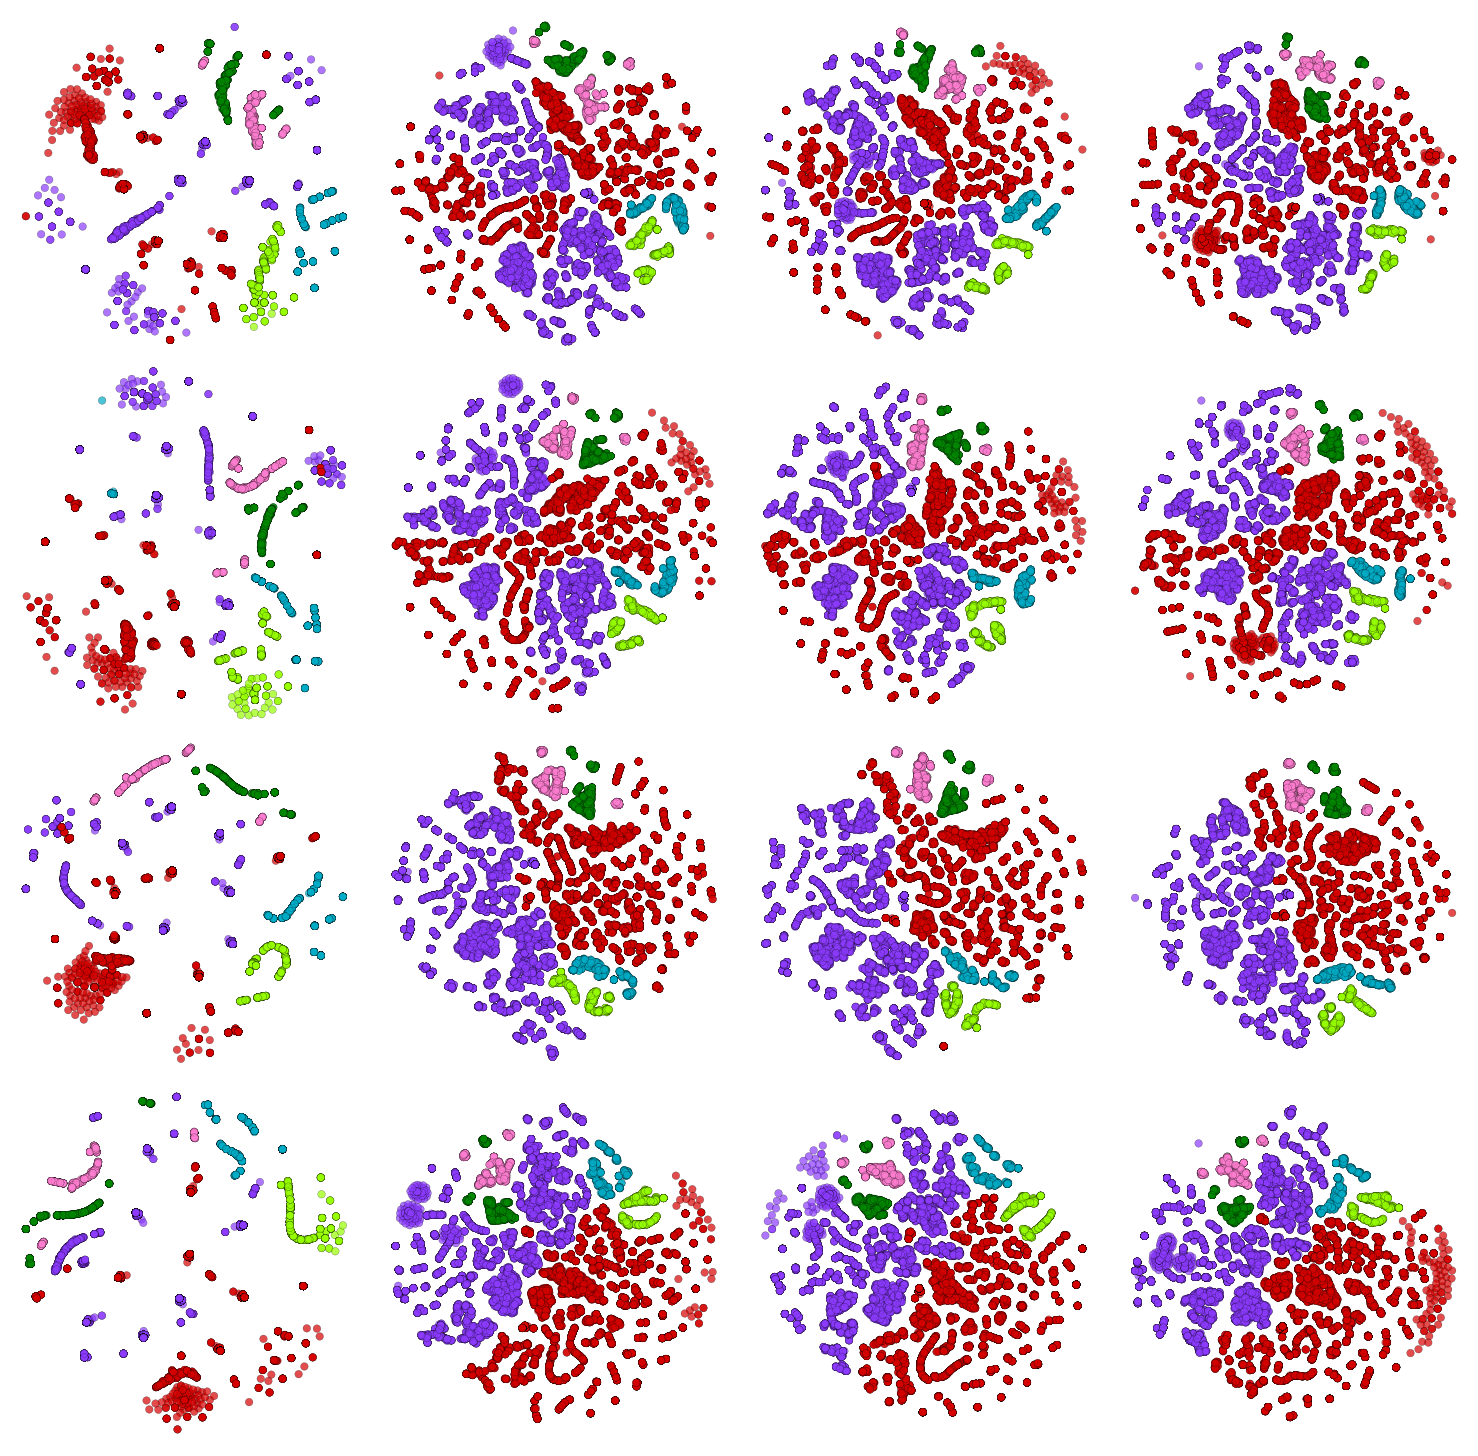

In [9]:
plotter = tsne_plotter(full_raw_df)
plotter.plot_every_features(feature_sets=feature_exclu_list)
plt.tight_layout()
# plt.savefig("saved_figures/tsne-all_host-exclu.png", dpi=150)
# plt.axis("off")

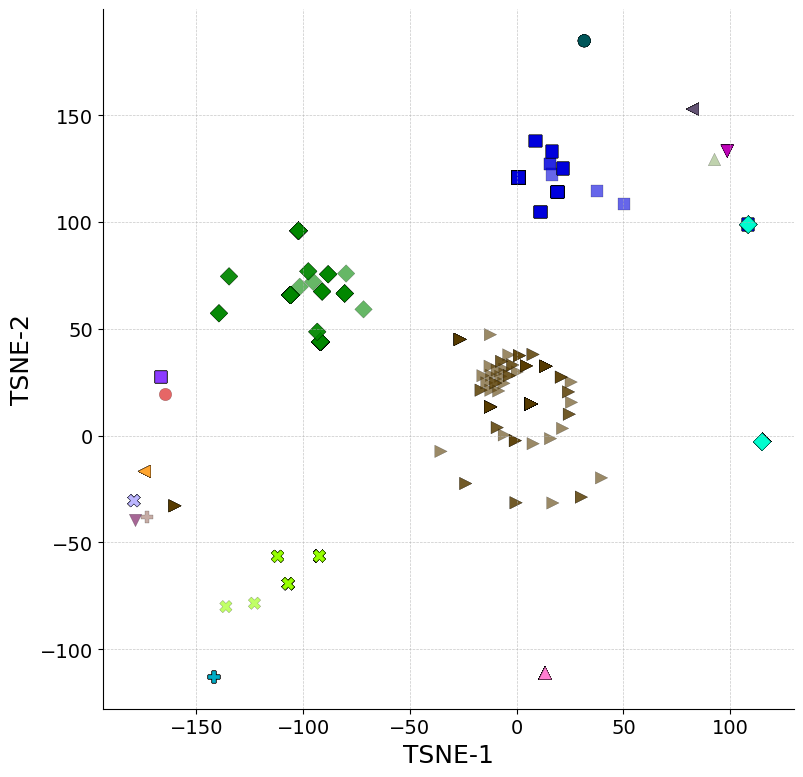

In [10]:
plotter.plot_single_host(feature_set = 'chem_dist0_cfid',file_name='wse2_low',is_label=False)
plt.tight_layout()
# plt.savefig('saved_figures/tsne-wse2_ori_exclu_both.pdf',dpi=300)
# plt.show()

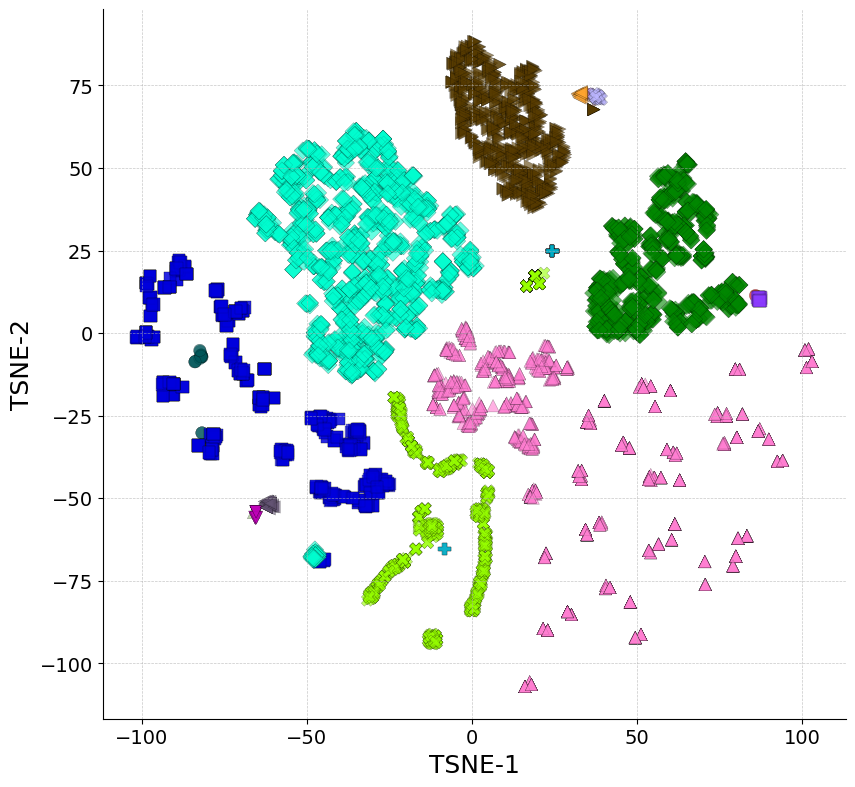

In [11]:

plotter = tsne_plotter(full_raw_df)
plotter.plot_single_host(feature_set = 'vpa_divi_chem_hellinger_l1_pristine_cfid',file_name='wse2_low',is_label=False)
plt.tight_layout()
# plt.savefig('saved_figures/tsne-wse2_eng_exclu_both.pdf',dpi=300)
# plt.show()

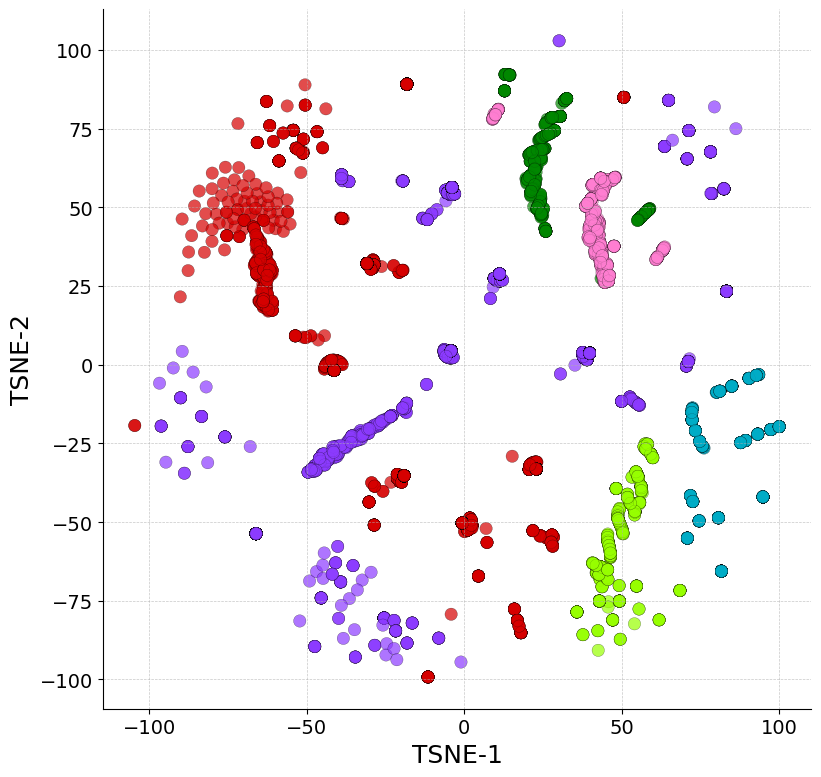

In [12]:
plotter.plot_all_host(feature_set = 'chem_dist0_cfid',is_label=False)
plt.tight_layout()
# plt.savefig("saved_figures/tsne-all_host_ori_exclu_both.pdf",dpi=300)
plt.show()

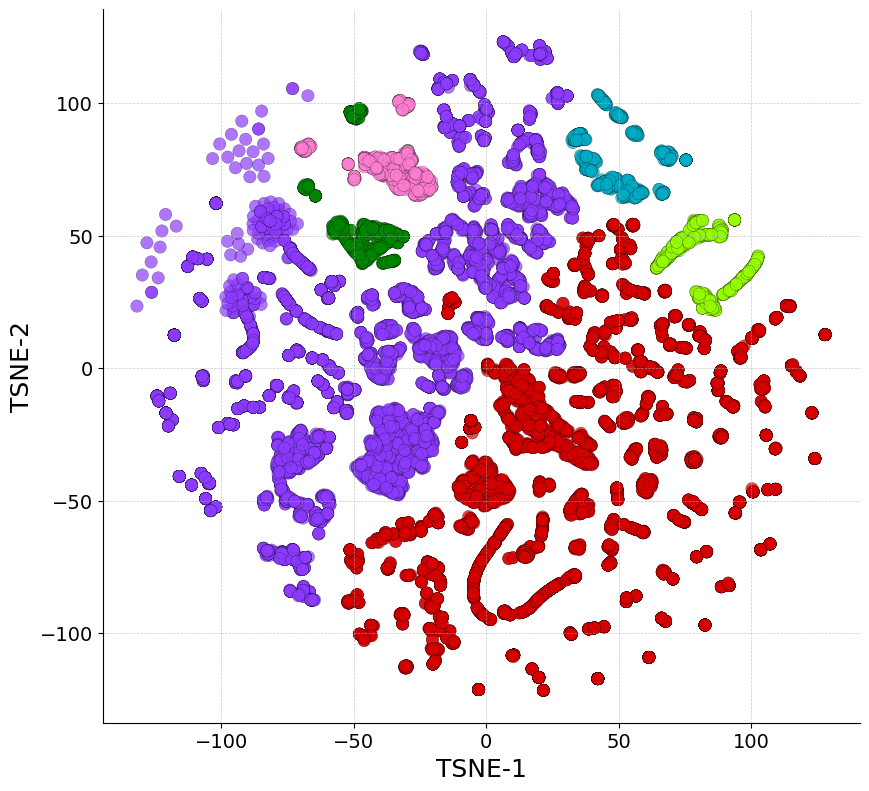

In [13]:
plotter.plot_all_host(feature_set = 'vpa_divi_chem_hellinger_l1_pristine_cfid',is_label=False)
plt.tight_layout()
# plt.savefig("saved_figures/tsne-all_host_eng_exclu_both.pdf",dpi=300)
plt.show()

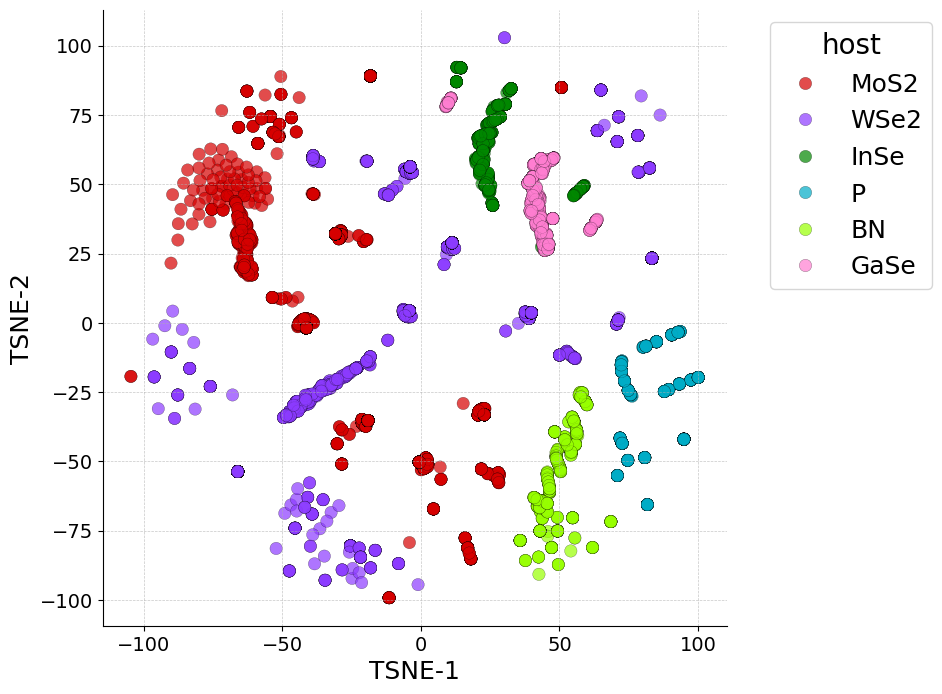

In [14]:

plotter.plot_all_host(feature_set = 'chem_dist0_cfid',is_label=True)
plt.show()

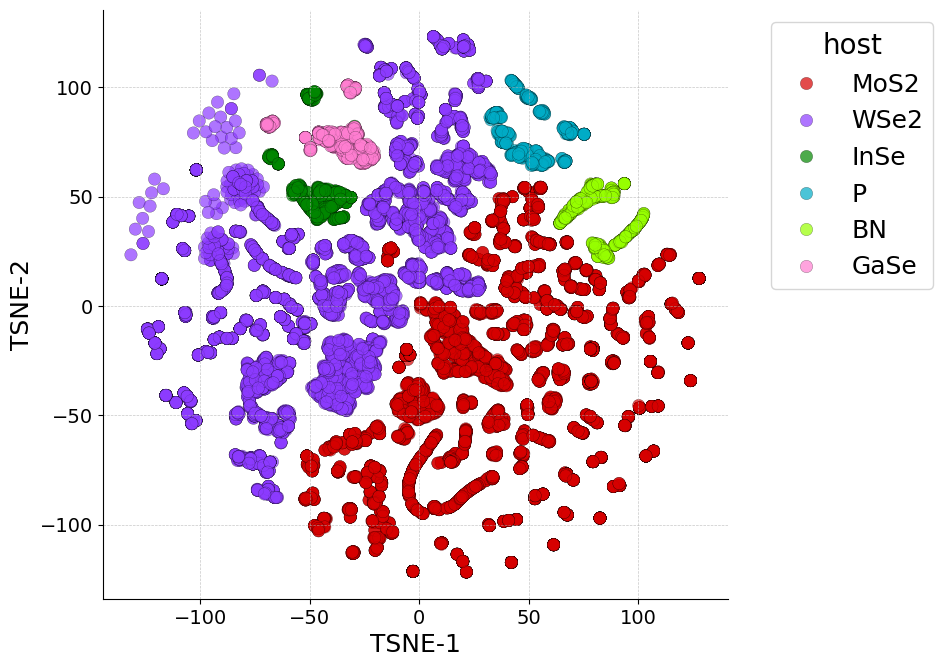

In [15]:
plotter.plot_all_host(feature_set = 'vpa_divi_chem_hellinger_l1_pristine_cfid',is_label=True)
plt.show()